# Task 1: Classification

- Initially we will import all the libraries which will be used in our assignment

In [725]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")


In [726]:
# Loading the dataset and making dataframe
yourdataframe = pd.read_csv("loan_train.csv")
yourdataframe_copy = yourdataframe
yourdataframe.drop(yourdataframe.columns[[0,1]],axis=1,inplace = True)
yourdataframe.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [727]:
# Checking number of rows and columns
yourdataframe.shape

(346, 8)

- In total we have 346 rows and 8 columns. Now I will remove the duplicate rows.

In [728]:
# Removing duplicate rows 
yourdataframe.drop_duplicates(keep='first', inplace=True)

In [729]:
# describing my dataframe
yourdataframe.describe()

,Principal,terms,age
count,306.000000,306.000000,306.000000
mean,940.196078,22.183007,31.179739
std,113.015134,8.048572,6.192305
min,300.000000,7.000000,18.000000
25%,800.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


In [730]:
yourdataframe.columns

Index(['loan_status', 'Principal', 'terms', 'effective_date', 'due_date',
       'age', 'education', 'Gender'],
      dtype='object')

- Now I am checking the empty rows in our dataframe

In [731]:
yourdataframe.isna().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

- Now lets print the overall information of the dataframe

In [732]:
# complete information of data with datatypes of columns
yourdataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     306 non-null    object
 1   Principal       306 non-null    int64 
 2   terms           306 non-null    int64 
 3   effective_date  306 non-null    object
 4   due_date        306 non-null    object
 5   age             306 non-null    int64 
 6   education       306 non-null    object
 7   Gender          306 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.5+ KB


- Let's check the differrence of the outliers

In [733]:
# Difference of outliers  
Q1 = yourdataframe.quantile(0.25)
Q3 = yourdataframe.quantile(0.75)
IQR = Q3 - Q1
# Printing difference between outliers
print(IQR)

Principal    200.0
terms         15.0
age            8.0
dtype: float64


- Data Visualization by box plot to see mean, median and quartile values for our classification

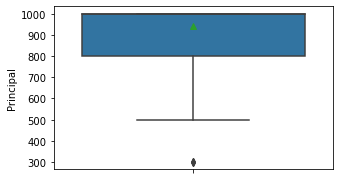

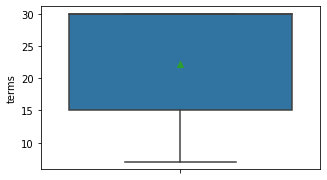

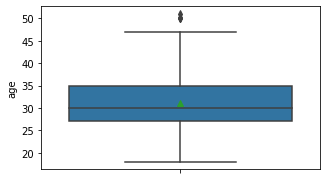

In [734]:
# visualizing by box-ploting
for i in yourdataframe.drop(columns = ['loan_status','education','Gender','effective_date','due_date']).columns:
    plt.figure(figsize=(5,3))
    sb.boxplot(y=i, data=yourdataframe, showmeans=True)
    plt.show()

## Question 2

In [735]:
# Saving specific column in a variable
y = yourdataframe['loan_status'].values
y

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 

- The main purpose of standardizing a dataset is to ensure that all features are on the same scale. Subtracting the mean from each feature and dividing by the standard deviation. It is often used to scale the features of a dataset so that they have a mean of 0 and a standard deviation of 1.

In [736]:
# dropping unnecessary columns and saving in a variable
X = yourdataframe.drop(['loan_status','education','Gender','effective_date','due_date'],axis=1)
# Normalization Standard Scaler
X = preprocessing.StandardScaler().fit(X).transform(X)
X 


array([[ 0.53003415,  0.97281823,  2.23550031],
       [ 0.53003415,  0.97281823,  0.29443691],
       [ 0.53003415, -0.89391909, -0.6760948 ],
       [ 0.53003415,  0.97281823, -0.51433951],
       [ 0.53003415,  0.97281823, -0.35258423],
       [ 0.53003415,  0.97281823,  0.77970276],
       [ 0.53003415,  0.97281823, -0.51433951],
       [-1.24253908, -0.89391909, -0.83785008],
       [-5.67397215, -1.88951233, -0.35258423],
       [ 0.53003415, -0.89391909,  1.26496861],
       [ 0.53003415,  0.97281823, -0.83785008],
       [-0.35625246, -1.88951233, -0.83785008],
       [ 0.53003415, -1.88951233, -0.6760948 ],
       [ 0.53003415,  0.97281823,  1.42672389],
       [ 0.53003415, -0.89391909,  0.13268162],
       [ 0.53003415,  0.97281823,  0.13268162],
       [-1.24253908,  0.97281823, -0.83785008],
       [ 0.53003415,  0.97281823, -0.99960537],
       [ 0.53003415, -0.89391909, -0.83785008],
       [ 0.53003415,  0.97281823, -0.35258423],
       [-1.24253908, -0.89391909,  1.264

# Data Modelling

In [737]:
X_train, X_test,y_train,y_test = train_test_split(
    X, y, test_size=0.3, random_state=15)
print('X train size', X_train.shape)
print('y train size', y_train.shape)
print('X test size', X_test.shape)
print('y test size', y_test.shape)

X train size (214, 3)
y train size (214,)
X test size (92, 3)
y test size (92,)


# 1) Logistic Regression

In [738]:
# Build the model
Logisticmodel = LogisticRegression(
    C=0.01, solver='liblinear').fit(X_train, y_train)
print (Logisticmodel)

LogisticRegression(C=0.01, solver='liblinear')


In [739]:
logistic_predictions = Logisticmodel.predict(X_test)

### Accuracy  

In [740]:
Logisticmodel.score(X_test,y_test)

0.75

- The accuracy of my logistic regression if 75%. To evaluate the accuracy of a logistic regression model, I will use common classification metrics such as precision, recall, and the F1 score later

### Classification Report 

In [741]:
print(classification_report(y_test,logistic_predictions))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        23
     PAIDOFF       0.75      1.00      0.86        69

    accuracy                           0.75        92
   macro avg       0.38      0.50      0.43        92
weighted avg       0.56      0.75      0.64        92



### Confusion Matrix LR

- I will use the confusion matrix to visualize the model's performance, which allows me to see the number of true positive, true negative, false positive, and false negative predictions made by the model. 75 percent of the PAIDOFF is correct and the minor wrong prediction of 25 came which is shown below. There is nothing for the Collection shown, it can be becuase when we randomize our data above for modelling, it didn't get this.

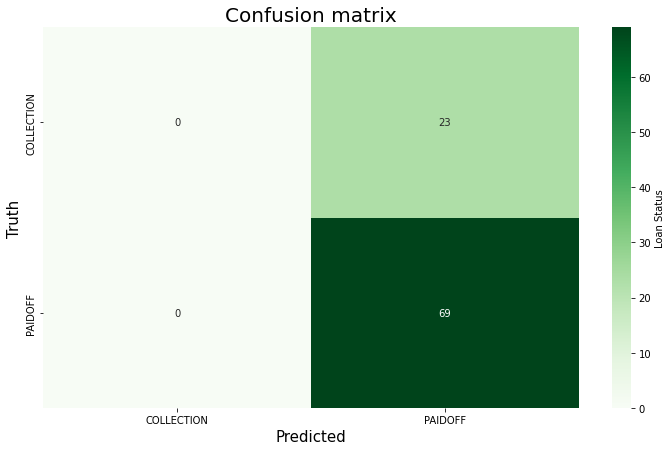

In [742]:
# Confusion Matrix
cm_Logisticmodel = confusion_matrix(y_test,logistic_predictions)

# plot confusion matrix 
plt.figure(figsize=(12,7))
sentiment_classes = ['COLLECTION', 'PAIDOFF']
sb.heatmap(cm_Logisticmodel, cmap=plt.cm.Greens, annot=True,cbar_kws={'label': 'Loan Status'},  fmt='d',  
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

#  2) KNN

In [743]:
# Making KNN Model
KNN = KNeighborsClassifier(n_neighbors=16).fit(X_train, y_train)
print (KNN)

KNeighborsClassifier(n_neighbors=16)


In [744]:
KNN_predictions = KNN.predict(X_test)

### Accuracy 

- The accuracy of my KNN is 73%. To evaluate the accuracy of a logistic regression model, I will use common classification metrics such as precision, recall, and the F1 score later

In [745]:
# Checking the accuracy
KNN.score(X_test,y_test)

0.7391304347826086

### Classification Report

In [746]:
print(classification_report(y_test,KNN_predictions))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        23
     PAIDOFF       0.75      0.99      0.85        69

    accuracy                           0.74        92
   macro avg       0.37      0.49      0.43        92
weighted avg       0.56      0.74      0.64        92



### Confusion Matrix KNN

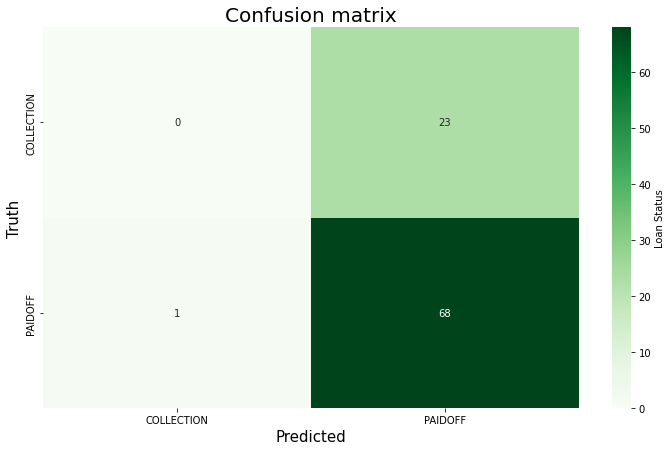

In [747]:
# Confusion Matrix
cm_KNN = confusion_matrix(y_test,KNN_predictions)

# plot confusion matrix 
plt.figure(figsize=(12,7))
sentiment_classes = ['COLLECTION', 'PAIDOFF']
sb.heatmap(cm_KNN, cmap=plt.cm.Greens, annot=True,cbar_kws={'label': 'Loan Status'},  fmt='d',  
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

-  PAIDOFF is 75 percent correct in PAIDOFF while  26 percent wrong.

# 3) Decision Tree

In [748]:
# Making Decision Tree Model
Dec_Tree = DecisionTreeClassifier(
    criterion='entropy', max_depth=4).fit(X_train, y_train)

In [749]:
Dec_Tree_predictions = Dec_Tree.predict(X_test)

### Accuracy 

In [750]:
# Checking the accuracy
Dec_Tree.score(X_test,y_test)

0.75

- Decision tree is giving the accuracy of 75 percent which we will check through confusion matric and classification report as well.

### Classification Report

In [751]:
print(classification_report(y_test,Dec_Tree_predictions))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        23
     PAIDOFF       0.75      1.00      0.86        69

    accuracy                           0.75        92
   macro avg       0.38      0.50      0.43        92
weighted avg       0.56      0.75      0.64        92



### Confusion Matrix DT

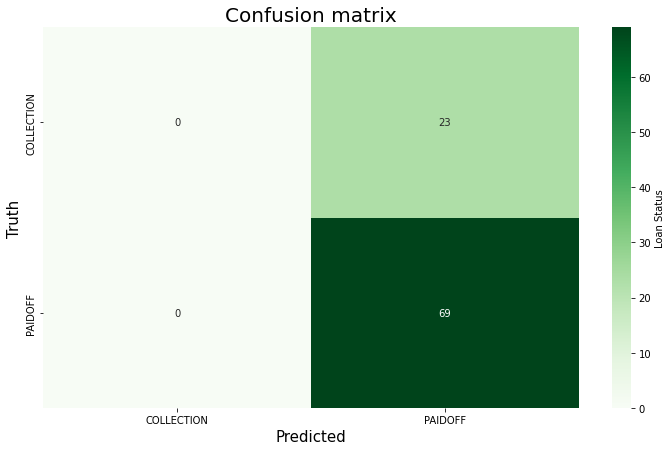

In [752]:

# Confusion Matrix
cm_Dec_Tree = confusion_matrix(y_test,Dec_Tree_predictions)

# plot confusion matrix 
plt.figure(figsize=(12,7))
sentiment_classes = ['COLLECTION', 'PAIDOFF']
sb.heatmap(cm_Dec_Tree, cmap=plt.cm.Greens, annot=True,cbar_kws={'label': 'Loan Status'},  fmt='d',  
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

-  75 percent of the PAIDOFF is correct and the minor wrong prediction of 25 came which is shown below

# 4) SVM

In [753]:
# Building the SVM Model
SVM = svm.SVC(kernel='rbf').fit(X_train, (y_train))

In [754]:
SVM_predictions = SVM.predict(X_test)

### Accuracy 

In [755]:
SVM.score(X_test,y_test)

0.75

- The accuracy of the SVM model is 75 percent as shown

### Classification Report 

In [756]:
print(classification_report(y_test,SVM_predictions))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        23
     PAIDOFF       0.75      1.00      0.86        69

    accuracy                           0.75        92
   macro avg       0.38      0.50      0.43        92
weighted avg       0.56      0.75      0.64        92



### Confusion Matrix SVM

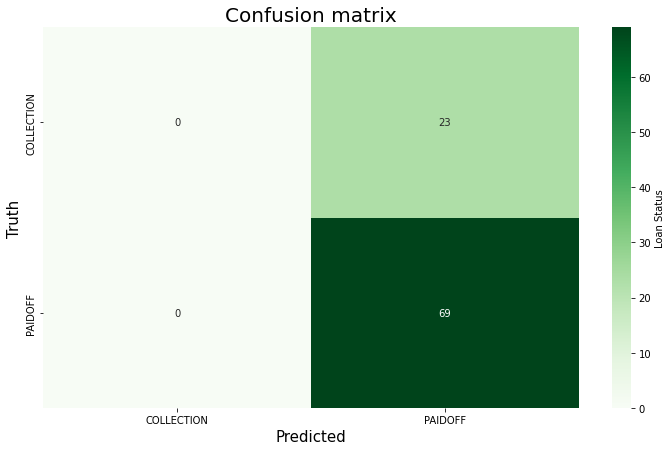

In [757]:
cm_svm = confusion_matrix(y_test,SVM_predictions)

# plot confusion matrix 
plt.figure(figsize=(12,7))
sentiment_classes = ['COLLECTION', 'PAIDOFF']
sb.heatmap(cm_svm, cmap=plt.cm.Greens, annot=True,cbar_kws={'label': 'Loan Status'},  fmt='d',  
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

- PAIDOFF is 75 percent correct in PAIDOFF while  25 percent wrong. Overall among the whole models, All three models are giving the same accuracy which is tehe highest 75% It's important to note that accuracy is not always the best metric to evaluate a model's performance, especially if the class distribution is imbalanced. In these cases, other metrics such as precision, recall, and the F1 score may be more informative.

# Question 3

# Linear Regression

In [758]:
# Use GridSearchCV for hyperparameter tuning
parameters = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}
LR_new = GridSearchCV(Logisticmodel, parameters)

In [759]:
LR_new.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(C=0.01, solver='liblinear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [760]:
LR_prediction_new = LR_new.predict(X_test)
LR_new.score(X_test, y_test)

0.75

# KNN

In [761]:
parameters = dict(n_neighbors=list(range(1, 31)))
KNN_new = GridSearchCV(KNN, parameters)


In [762]:
KNN_new.fit(X_train, (y_train))

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=16),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [763]:
KNN_prediction_new = KNN_new.predict(X_test)
KNN_new.score(X_test, y_test)

0.75

# Decision Tree

In [764]:
parameters = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
DT_new = GridSearchCV(Dec_Tree, parameters)


In [765]:
DT_new.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [766]:
DT_prediction_new = DT_new.predict(X_test)
DT_new.score(X_test, y_test)

0.75

# SVM

In [767]:
parameters = {'kernel': ('linear', 'rbf'), 'C': [1, 10]}
SVM_new = GridSearchCV(SVM, parameters)

In [768]:
SVM_new.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [769]:
SVM_prediction_new = SVM.predict(X_test)
SVM_new.score(X_test, y_test)

0.75

- I am using GridSearchCV to optimize the hyperparameters of a classification model, it is possible that the optimized model will produce the same output as the original model, depending on the specific hyperparameters being optimized and the values of those hyperparameters. We can see that we are getting same scores for the original models and after applying GridSearchCV.If the accuracy is different as we can see in some cases then the optimized model would be expected to have better performance than the original model, as long as the scoring metric used to evaluate the model is reliable.

# Task 2

In [770]:
# importing libraries
# ! pip install apyori
# ! pip install pandas mlxtend
from apyori import apriori

In [771]:
# Reading the dataset and making dataframe 
yourdata_frame = pd.read_fwf('item_list.csv', header=None)
# Fixing the comma separations in file
yourdata_frame = yourdata_frame[0].str.split(',', 1, expand=True)
yourdata_frame = yourdata_frame.drop([0, 0])
# Titling the columns in a dataframe
yourdata_frame.columns = ['IDs','itemlist']
yourdata_frame.head()

,IDs,itemlist
1,1,"sausage,whole milk,semi-finished bread,yogurt"
2,2,"whole milk,pastry,salty snack"
3,3,"canned beer,misc. beverages"
4,4,"sausage,hygiene articles"
5,5,"soda,pickled vegetables"


In [772]:
# removing extra which is not required
rem = {'/': ','}
yourdata_frame['itemlist'].replace(rem, regex=True, inplace=True)

In [773]:
# saving in an array 
content = []
yourdata_frame['itemlist'].apply(lambda x: content.append(x.split(',')))

1        None
2        None
3        None
4        None
5        None
         ... 
14959    None
14960    None
14961    None
14962    None
14963    None
Name: itemlist, Length: 14963, dtype: object

- Now we have separated and then saved all the content in a form of array to process our algorithim.

In [774]:
# Creating the model

aprio = apriori(transactions=content, min_support=0.001, min_confidence=0.05, min_lift=3, min_length=2, max_length=2)
aprio


<generator object apriori at 0x00000253E7573040>

In [775]:
sav = list(aprio)
for item in sav:

    # Saving the indexes of the the list we created for the content
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support value: " + str(item[1]))
    
    print("Confidence Value: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print ("*************************************")

Rule: bags -> cling film
Support value: 0.004945532313038829
Confidence Value: 0.9487179487179487
Lift: 191.83333333333331
*************************************
Rule: red -> blush wine
Support value: 0.010425716768027803
Confidence Value: 1.0
Lift: 95.30573248407643
*************************************
Rule: buns -> rolls
Support value: 0.10940319454654815
Confidence Value: 1.0
Lift: 9.134920634920634
*************************************
Rule: fertilizer -> flower soil
Support value: 0.0010693042839002875
Confidence Value: 1.0
Lift: 935.1874999999999
*************************************
Rule: film -> photo
Support value: 0.005212858384013901
Confidence Value: 1.0
Lift: 191.83333333333331
*************************************
Rule: vegetable juice -> fruit
Support value: 0.03328209583639644
Confidence Value: 0.9803149606299213
Lift: 29.454724409448822
*************************************
Rule: nuts -> prunes
Support value: 0.002205440085544343
Confidence Value: 1.0
Lift: 453.4242424

- Now making separate models by changing the values of support and confidence to see how they varies.

In [776]:
# Creating the model

aprio = apriori(transactions=content, min_support=0.03, min_confidence=0.2, min_lift=3, min_length=2, max_length=2)
aprio

<generator object apriori at 0x00000253E72432E0>

In [777]:
sav = list(aprio)
for item in sav:

    # Saving the indexes of the the list we created for the content
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support value: " + str(item[1]))
    
    print("Confidence Value: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print ("*************************************")
   

Rule: buns -> rolls
Support value: 0.10940319454654815
Confidence Value: 1.0
Lift: 9.134920634920634
*************************************
Rule: vegetable juice -> fruit
Support value: 0.03328209583639644
Confidence Value: 0.9803149606299213
Lift: 29.454724409448822
*************************************
Rule: whipped -> sour cream
Support value: 0.0429726659092428
Confidence Value: 1.0
Lift: 23.12673879443586
*************************************


In [778]:
sav

[RelationRecord(items=frozenset({'buns', 'rolls'}), support=0.10940319454654815, ordered_statistics=[OrderedStatistic(items_base=frozenset({'buns'}), items_add=frozenset({'rolls'}), confidence=1.0, lift=9.134920634920634), OrderedStatistic(items_base=frozenset({'rolls'}), items_add=frozenset({'buns'}), confidence=0.9993894993894994, lift=9.134920634920634)]),
 RelationRecord(items=frozenset({'vegetable juice', 'fruit'}), support=0.03328209583639644, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fruit'}), items_add=frozenset({'vegetable juice'}), confidence=0.9803149606299213, lift=29.454724409448822), OrderedStatistic(items_base=frozenset({'vegetable juice'}), items_add=frozenset({'fruit'}), confidence=1.0, lift=29.454724409448822)]),
 RelationRecord(items=frozenset({'whipped', 'sour cream'}), support=0.0429726659092428, ordered_statistics=[OrderedStatistic(items_base=frozenset({'sour cream'}), items_add=frozenset({'whipped'}), confidence=1.0, lift=23.12673879443586), Ord

In [779]:
# Creating the model

aprio = apriori(transactions=content, min_support=0.0005, min_confidence=0.0025, min_lift=3, min_length=2, max_length=2)
aprio


<generator object apriori at 0x00000253E6E902E0>

In [780]:
sav = list(aprio)
for item in sav:

    # Saving the indexes of the the list we created for the content
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support value: " + str(item[1]))
    
    print("Confidence Value: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print ("*************************************")

Rule: bags -> cling film
Support value: 0.004945532313038829
Confidence Value: 0.9487179487179487
Lift: 191.83333333333331
*************************************
Rule: red -> blush wine
Support value: 0.010425716768027803
Confidence Value: 1.0
Lift: 95.30573248407643
*************************************
Rule: buns -> rolls
Support value: 0.10940319454654815
Confidence Value: 1.0
Lift: 9.134920634920634
*************************************
Rule: fertilizer -> flower soil
Support value: 0.0010693042839002875
Confidence Value: 1.0
Lift: 935.1874999999999
*************************************
Rule: film -> photo
Support value: 0.005212858384013901
Confidence Value: 1.0
Lift: 191.83333333333331
*************************************
Rule: vegetable juice -> fruit
Support value: 0.03328209583639644
Confidence Value: 0.9803149606299213
Lift: 29.454724409448822
*************************************
Rule: nuts -> prunes
Support value: 0.002205440085544343
Confidence Value: 1.0
Lift: 453.4242424

In [781]:
sav

[RelationRecord(items=frozenset({'bags', 'cling film'}), support=0.004945532313038829, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bags'}), items_add=frozenset({'cling film'}), confidence=0.9487179487179487, lift=191.83333333333331), OrderedStatistic(items_base=frozenset({'cling film'}), items_add=frozenset({'bags'}), confidence=1.0, lift=191.83333333333331)]),
 RelationRecord(items=frozenset({'red', 'blush wine'}), support=0.010425716768027803, ordered_statistics=[OrderedStatistic(items_base=frozenset({'blush wine'}), items_add=frozenset({'red'}), confidence=1.0, lift=95.30573248407643), OrderedStatistic(items_base=frozenset({'red'}), items_add=frozenset({'blush wine'}), confidence=0.9936305732484076, lift=95.30573248407643)]),
 RelationRecord(items=frozenset({'buns', 'rolls'}), support=0.10940319454654815, ordered_statistics=[OrderedStatistic(items_base=frozenset({'buns'}), items_add=frozenset({'rolls'}), confidence=1.0, lift=9.134920634920634), OrderedStatistic(items

### Conclusions 

- We can see by changing the values of the confidence and support the model varies. As we increase the value of min_support, the number of frequent itemsets and association rules generated by the Apriori algorithm will decrease. This is because a higher min_support value means that an itemset or association rule must be more frequent in the dataset in order to be considered as valid.

- As we increase the value of min_confidence, the number of association rules generated by the Apriori algorithm will decrease. This is because a higher min_confidence value means that an association rule must be more confident (i.e., have a higher probability of being true) in order to be considered as valid.